In [95]:
import numpy as np
from implementations import *
from general_helpers import *
from proj1_helpers import *
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [96]:
'''Load the data both from train and test csv file'''

y, x, ids = load_csv_data("train.csv", sub_sample=False)
_, x_submission, ids_submission = load_csv_data("test.csv", sub_sample=False)

y_small, x_small, ids_small = load_csv_data("train.csv", sub_sample=True)

In [23]:
'''Test different ways of "cleaning" data'''
x1 = np.copy(x)
compare(x1)

Here are the means of the columns containing -999 (not counting -999. for the mean calculation)

0.0
5.51397102408e-05
6.8924637801e-05
8.27095653612e-05
0.000165419130722
0.000153244451551
0.000159907253793
0.000166570056034
0.000358408116565
0.000372193044126
0.000385977971686

Note that these are all very close to zero.

Here are a few orders of magnitude of the differences between the cleaned X-matrices:

Set to 0 vs Replace by mean
First by simply replacing by the mean, then by normally distributed values around the mean.
These are actually so close to zero, and the values of the features so much bigger that
we might as well simply set outliers to 0


(array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          -2.42266536e-04,  -2.79556436e-04,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           9.86765811e-05,   1.14432638e-04,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           9.86765811e-05,   1.14432638e-04,   0.00000000e+00],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           9.86765811e-05,   1.14432638e-04,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           9.86765811e-05,   1.14432638e-04,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           9.86765811e-05,   1.14432638e-04,   0.00000000e+00]]),
 array([[  1.11022302e-16,   4.16333634e-17,   1.11022302e-16, ...,
           2.42266536e-04,   2.79556436e-04,   2.22044605e-16],
        [  2.22044605e-16,   0.00000000e+00,   1.11022302e-1

In [98]:
#Set values to zero and standardize
x[x==-999] = 0
x = standardize_by_column(x)

x_small[x_small==-999] = 0
x_small = standardize_by_column(x_small)

In [53]:
'''Peforming Gradient Descent'''

degree = 1
ratio = 0.70  #train/test examples
 
seed = 1
dim_w = get_length_w(x,degree)
initial_w, max_iters, gamma = np.zeros(dim_w), 20 , 0.000001#requires fine balance btw. iter/gamma - otherwise blows up


w = GD_with_simple_splitting(y,x, degree, ratio, initial_w, max_iters, gamma, seed)#"simple splitting=>no cross validation

Correct answers:  70.4773333333 % Execution time=4.647702932357788 seconds


In [54]:
'''Performing SGD'''#Execution time is longer!!!

degree = 1
ratio = 0.70  #train/test examples
 
seed = 1
dim_w = get_length_w(x,degree)
initial_w, max_iters, gamma = np.zeros(dim_w), 20 , 0.000001#requires fine balance btw. iter/gamma - otherwise blows up


w = SGD_with_simple_splitting(y,x, degree, ratio, initial_w, max_iters, gamma, seed)

Correct answers:  64.8573333333 % Execution time=23.852055072784424 seconds


In [55]:
'''Least Squares'''

degree = 11
ratio = 0.70  #train/test examples
seed = 1

w = LS_with_simple_splitting(y,x, degree, ratio, seed)

Execution time=2.6984059810638428 seconds
Correct answers:  80.6426666667


In [ ]:
'''Define values to perform Ridge regression with cross validation of the dataset for different degrees and plot it'''

'''Load the data both from train and test csv file'''

k_fold = 5 #define the number of folds
degrees = list(range(1,20)) #define the degrees
lambda_ = 1e-4 #define the lambdas
seed = 145 #seed for the random splitting

loss_train,loss_test,corr_train, corr_test = cross_validation_ridge_degree(y_small, x_small,
                                                                           k_fold, degrees, lambda_, seed)

plt.figure()
#plt.title("Correct answers (%) vs complexity for train and test set")
plt.xlabel("Complexity (degree)")
plt.ylabel("Correct answers (%)")
plt.plot(degrees, corr_train, 'b', label = "Train set")
plt.hold(True)
plt.plot(degrees, corr_test, 'r', label = "Test set")
plt.xticks(range(1,20))
plt.legend()
plt.grid(True)
plt.savefig("correct_complexity.png", format='png', dpi=1000)
plt.show()

Correct answers:  82.6333333333 % for lambda = 0.000000
Correct answers:  82.6306666667 % for lambda = 0.000000
Correct answers:  82.6306666667 % for lambda = 0.000000
Correct answers:  82.6333333333 % for lambda = 0.000000
Correct answers:  82.6226666667 % for lambda = 0.000001
Correct answers:  82.6373333333 % for lambda = 0.000001
Correct answers:  82.6346666667 % for lambda = 0.000002
Correct answers:  82.6413333333 % for lambda = 0.000003
Correct answers:  82.6493333333 % for lambda = 0.000005
Correct answers:  82.6586666667 % for lambda = 0.000008
Correct answers:  82.6493333333 % for lambda = 0.000013
Correct answers:  82.664 % for lambda = 0.000021
Correct answers:  82.6866666667 % for lambda = 0.000034
Correct answers:  82.66 % for lambda = 0.000055
Correct answers:  82.6773333333 % for lambda = 0.000089
Correct answers:  82.676 % for lambda = 0.000144
Correct answers:  82.664 % for lambda = 0.000234
Correct answers:  82.6546666667 % for lambda = 0.000379
Correct answers:  82.

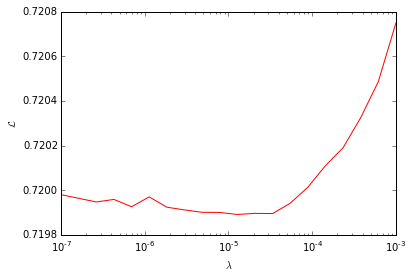

In [62]:
'''Ridge Regression'''
degree = 11
ratio = 0.70  #train/test examples
#lambdas = np.logspace(-8,0.1,20) 
lambdas = np.logspace(-7,-3,20)

seed = 1

w = ridge_with_simple_splitting(y,x, degree, ratio, lambdas, seed)


 k= 1 

Correct answers:  82.5392 % for lambda = 0.000000
Correct answers:  82.568 % for lambda = 0.000000
Correct answers:  82.5648 % for lambda = 0.000001
Correct answers:  82.5728 % for lambda = 0.000005
Correct answers:  82.5536 % for lambda = 0.000017
Correct answers:  82.5344 % for lambda = 0.000060
Correct answers:  82.4992 % for lambda = 0.000215
Correct answers:  82.5088 % for lambda = 0.000774
Correct answers:  82.5456 % for lambda = 0.002783
Correct answers:  82.2704 % for lambda = 0.010000

 k= 2 

Correct answers:  82.9616 % for lambda = 0.000000
Correct answers:  82.9424 % for lambda = 0.000000
Correct answers:  82.9584 % for lambda = 0.000001
Correct answers:  82.9728 % for lambda = 0.000005
Correct answers:  82.9616 % for lambda = 0.000017
Correct answers:  82.9584 % for lambda = 0.000060
Correct answers:  82.9472 % for lambda = 0.000215
Correct answers:  82.896 % for lambda = 0.000774
Correct answers:  82.7712 % for lambda = 0.002783
Correct answers:  82.5024 % for la

array([  3.92291496e-01,  -1.54643557e-01,  -2.96457980e-01,
         1.12301366e-01,   3.99263093e-02,  -3.10639315e-02,
         7.67852364e-03,  -9.81967865e-04,   6.97919345e-05,
        -2.61586867e-06,   4.03393962e-08,  -2.28303523e-01,
        -1.10915314e-03,   5.31831932e-02,   1.06913957e-03,
        -6.32358755e-03,   1.49655585e-03,  -1.46913329e-04,
         5.63779543e-06,   7.60597798e-08,  -1.20595485e-08,
         2.55442186e-10,   5.36699526e-02,  -2.07389747e-01,
        -1.13424693e-01,   1.36783594e-01,  -4.43966169e-02,
         7.17751302e-03,  -6.65271900e-04,   3.69098442e-05,
        -1.21024394e-06,   2.16054512e-08,  -1.61707020e-10,
         1.13778576e-01,   3.46668057e-02,  -2.10355110e-02,
         1.31701582e-02,  -2.64721563e-03,   9.75705329e-05,
         1.94938966e-05,  -1.42663843e-06,  -1.23773815e-10,
         1.65452567e-11,   2.62514302e-11,  -2.30920137e-02,
        -4.79143617e-02,   7.03827679e-04,   3.61910214e-03,
         1.34725143e-02,

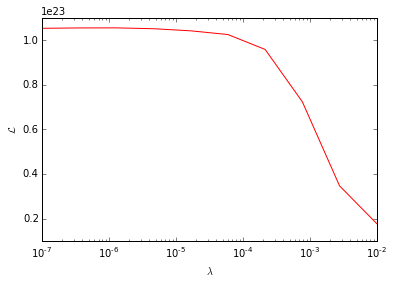

In [69]:
'''Ridge Regression With Cross Validation'''
degree = 11
lambdas = np.logspace(-7,-2,10)
k_fold = 4
seed = 1

cross_validation_ridge(y, x, k_fold, degree, lambdas, seed)

In [79]:
'''Logistic Regression'''
degree = 1
ratio = 0.70 
dim_w = get_length_w(x,degree, False)
initial_w, max_iters, gamma = np.zeros(dim_w), 1000 , 1.
logistic_with_simple_splitting(y,x, degree, ratio, initial_w, max_iters, gamma, seed = 1)

/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations_helpers.py:40: RuntimeWarning: overflow encountered in exp
  return sum(np.log(1+np.exp(np.dot(tx,w))) - y*np.dot(tx,w))
/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations_helpers.py:36: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-t) ) #np.exp(t)/(1+np.exp(t))
/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations.py:107: RuntimeWarning: invalid value encountered in double_scalars
  if iter_ > 1 and np.abs(loss - previousloss) < threshold:


Correct answers:  71.0693333333 %


array([  1.43527646e+07,  -3.56460549e+07,  -5.11968632e+06,
         8.98847423e+06,   5.06757646e+06,   6.39531140e+06,
        -5.85289604e+06,   1.18735788e+07,  -3.68936223e+06,
         1.57923475e+06,  -1.60300539e+07,   2.08289707e+07,
         6.77927288e+06,   1.23143363e+07,  -3.21772931e+04,
        -3.52868882e+05,  -2.52703905e+06,   1.21783186e+05,
         1.30376000e+05,  -6.04136757e+06,   3.04893760e+05,
         6.46184871e+05,   3.51771028e+05,   4.57704923e+06,
        -5.08941735e+04,   1.90692093e+04,  -2.83991772e+06,
        -1.85971325e+03,  -1.80275236e+04,  -3.82627735e+05,
        -8.02454118e+07])

In [82]:
'''Regularized Logistic Regression'''
degree = 1
ratio = 0.7
dim_w = get_length_w(x,degree, False)
initial_w, max_iters, gamma = np.zeros(dim_w), 1000 , 1.
lambdas = np.logspace(-8,0.1,5)
reg_logistic_with_simple_splitting(y,x, 1, ratio, initial_w, max_iters, gamma, lambdas, seed = 1)

/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations_helpers.py:40: RuntimeWarning: overflow encountered in exp
  return sum(np.log(1+np.exp(np.dot(tx,w))) - y*np.dot(tx,w))
/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations_helpers.py:36: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-t) ) #np.exp(t)/(1+np.exp(t))
/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations.py:138: RuntimeWarning: invalid value encountered in double_scalars
  if iter_ > 1 and np.abs(loss - previousloss) < threshold:


Correct answers:  71.0693333333 % for lambda = 0.000000
Correct answers:  71.0693333333 % for lambda = 0.000001
Correct answers:  71.0693333333 % for lambda = 0.000112
Correct answers:  71.072 % for lambda = 0.011885
Correct answers:  39.8946666667 % for lambda = 1.258925


array([  4.43526899e+03,  -2.19608024e+04,   6.36091718e+02,
        -4.88504139e+04,  -4.30326596e+04,  -3.04006988e+04,
        -6.84606606e+02,   4.62575121e+04,  -3.32542412e+04,
        -6.20939868e+04,  -3.09991229e+04,  -1.64915587e+04,
        -3.90441861e+04,   4.19313864e+02,  -7.69643942e+02,
        -1.02937346e+03,  -3.06123851e+04,  -7.30396301e+02,
         4.37549267e+02,  -4.02877426e+04,   1.07913253e+02,
        -5.92467043e+04,  -7.20065927e+04,  -5.67159122e+04,
        -2.13805811e+01,   2.88505810e+02,  -6.44626571e+04,
         4.25459073e+01,   3.60840979e+01,  -6.65056105e+04,
        -7.61152992e+04])

In [83]:
'''(Reg.) Logistic Regression With Cross Validation'''#This function takes around 1 hour!

k_fold = 4 #define the number of folds
degree = 11 #define the degree
dim_w = get_length_w(x,degree, False)
initial_w, max_iters, gamma = np.zeros(dim_w), 500 , 1.
lambdas = np.logspace(-5,0,5) #define the lambdas
seed = 1 #seed for the random splitting

cross_validation_logistic(y, x, initial_w, max_iters, gamma, k_fold, degree, lambdas, seed)


 k= 1 



/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations_helpers.py:40: RuntimeWarning: overflow encountered in exp
  return sum(np.log(1+np.exp(np.dot(tx,w))) - y*np.dot(tx,w))
/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations_helpers.py:36: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-t) ) #np.exp(t)/(1+np.exp(t))
/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations.py:138: RuntimeWarning: invalid value encountered in double_scalars
  if iter_ > 1 and np.abs(loss - previousloss) < threshold:


Correct answers:  55.2016 % for lambda = 0.000010
Correct answers:  55.2592 % for lambda = 0.000316
Correct answers:  53.7472 % for lambda = 0.010000
Correct answers:  55.8832 % for lambda = 0.316228


/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations_helpers.py:40: RuntimeWarning: invalid value encountered in subtract
  return sum(np.log(1+np.exp(np.dot(tx,w))) - y*np.dot(tx,w))
/Users/Francisco/Documents/Physics/EPFL/Machine Learning/project_1_final/project_1_final/project_1_final-master/implementations_helpers.py:40: RuntimeWarning: invalid value encountered in double_scalars
  return sum(np.log(1+np.exp(np.dot(tx,w))) - y*np.dot(tx,w))


Correct answers:  0.0 % for lambda = 10.000000

 k= 2 

Correct answers:  57.3776 % for lambda = 0.000010


KeyboardInterrupt: 

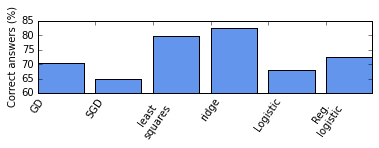

In [94]:
#HISTOGRAM

correct_perc = [70.5, 64.9, 79.8, 82.7, 68, 72.6]
methods = range(len(ys))
plt.figure(figsize=(6,2))
plt.xticks(methods, ["GD", "SGD","least\nsquares", "ridge","Logistic", "Reg.\nlogistic"],rotation=55, fontsize=10)
plt.bar(methods, correct_perc, color = 'cornflowerblue')
plt.ylim(60,85)
plt.ylabel("Correct answers (%)")
plt.gcf().subplots_adjust(bottom=.4)
plt.savefig("metods_bars.eps", format = "eps", dpi=1000)

In [ ]:
create_submission(x_submission, degree, ids_submission)